# Krzysztof Nalepa
## Sprawozdanie z ćwiczenia 13
## Generatory liczb pseudolosowych i metoda całkowania Monte Carlo

### Zadanie 1
Zaimplementuj generator liniowy kongruentny wg wzoru:
$$X_{i+1}=(aX_i+c)\ mod\ m$$
Generator ma zwracać wartości w zakresie [0...1], wartości startowe wg własnego wyboru. 

Przetestuj jego działanie dla różnych zestawów parametrów:

|     a         |   c           | m         |
| ------------- |:-------------:| ---------:|
|  1103515245   | 12345         |$$2^{32}$$ |
| 1229          | 1             | $$2048$$  |
| 1597          | 51749         | $$24494$$ |
| $2^{16}+3$    | 0             | $ 2^{31}$ |

Zwizualizuj rozkład generowanych liczby (histogram lub lepiej chmura punktów 2-D lub 3D ($X_i, X_{i+1}$), ($X_i, X_{i+1}, X_{i+2}$)). Oceń jakość generowanych rozkładów.


In [0]:
def random_generator(a, x, c, m, n):
    result = []
    for _ in range(n):
        x = (a * x + c) % m
        result.append(x / m)
    return result

In [3]:
print(random_generator(a=1103515245, x=100, c=12345, m=2**32, n=10))

[0.6932193518150598, 0.8569397632963955, 0.8442668064963073, 0.8161429651081562, 0.0963563194964081, 0.5163799407891929, 0.8730745872016996, 0.9991602888330817, 0.9259118151385337, 0.5309966118074954]


In [4]:
print(random_generator(a=1229, x=100, c=1, m=2048, n=10))

[0.01025390625, 0.6025390625, 0.52099609375, 0.3046875, 0.46142578125, 0.0927734375, 0.01904296875, 0.404296875, 0.88134765625, 0.1767578125]


In [5]:
print(random_generator(a=1597, x=100, c=51749, m=24494, n=10))

[0.6326855556462807, 0.51155384992243, 0.06421980893279987, 0.6717563484935086, 0.9076100269453744, 0.565934514574998, 0.9101412590838572, 0.6083122397321793, 0.5873683351024741, 0.13995264146321548]


In [6]:
print(random_generator(a=2**16 + 3, x=100, c=0, m=2**31, n=10))

[0.0030518975108861923, 0.018310965970158577, 0.08239871822297573, 0.3295936156064272, 0.23597322963178158, 0.44949683733284473, 0.5732219573110342, 0.3938602078706026, 0.20416363142430782, 0.6802399177104235]


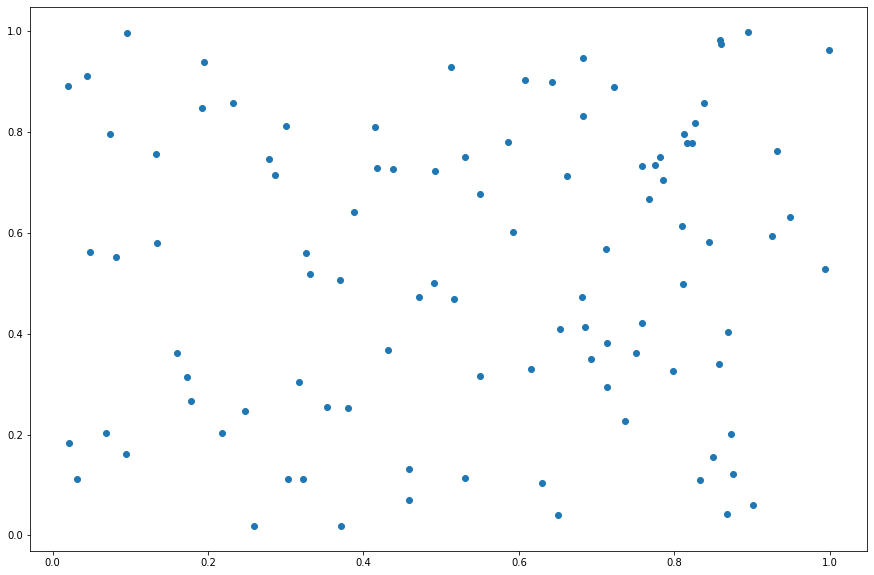

In [27]:
import matplotlib.pyplot as plt
def create_plot(a, x, c, m, n):
    numbers = random_generator(a, x, c, m, n * 2)
    X = numbers[:n]
    Y = numbers[n:]
    plt.figure(figsize=(15, 10))
    plt.scatter(X, Y, cmap='virdis')
    plt.show()

create_plot(a=1103515245, x=100, c=12345, m=2**32, n=100)

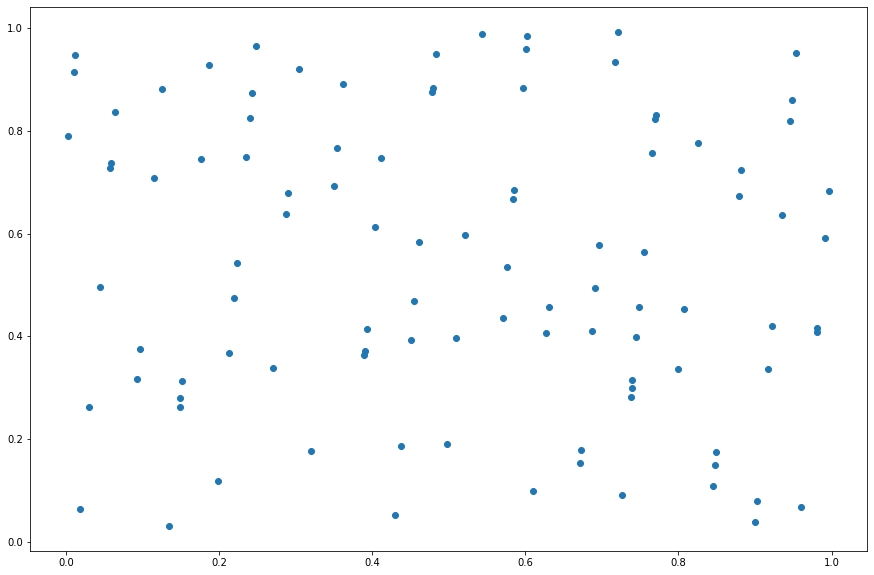

In [28]:
create_plot(a=1229, x=100, c=1, m=2048, n=100)

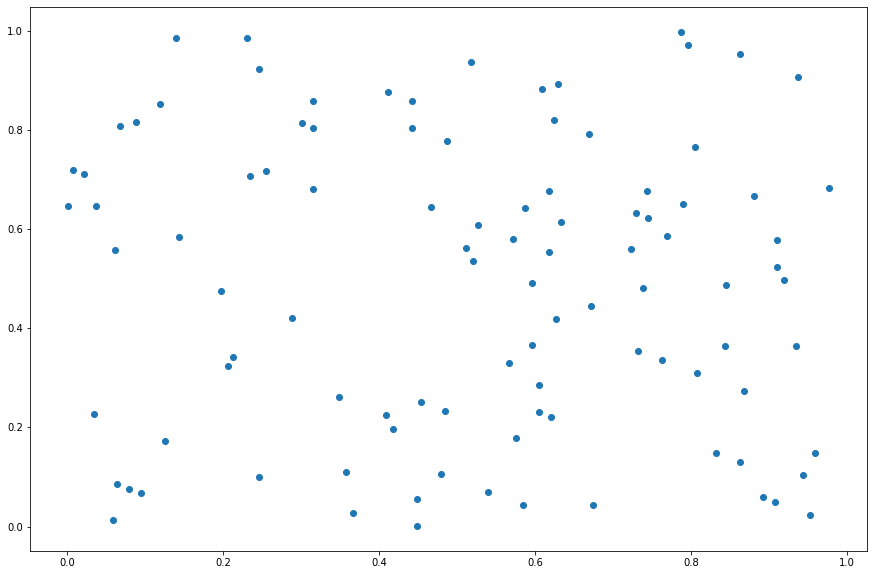

In [29]:
create_plot(a=1597, x=100, c=51749, m=24494, n=100)

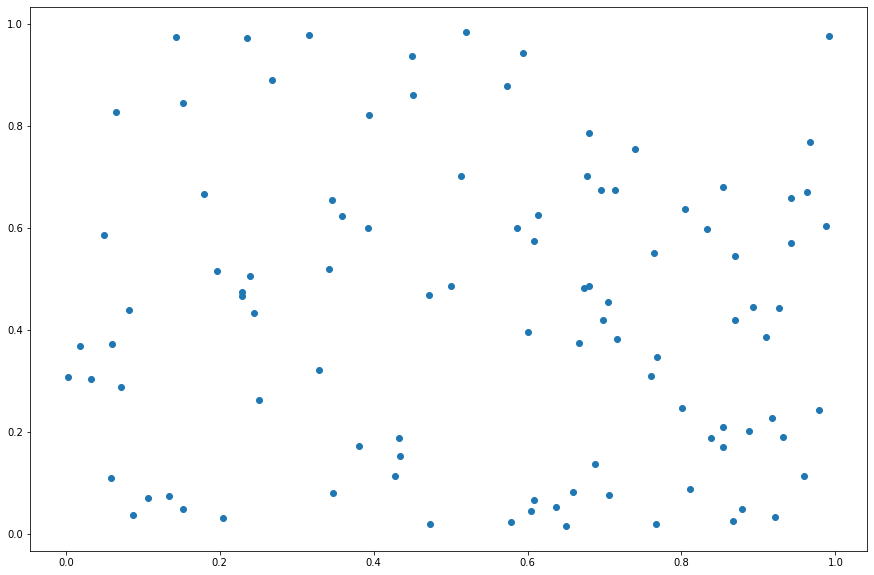

In [30]:
create_plot(a=2**16 + 3, x=100, c=0, m=2**31, n=100)

Generowane rozkłady są niezbyt dobre. Łatwo zauważyć że generowane punkty układają się na liniach (szczególnie dobrze to widać na 2 wykresie) i nie zapełniają całej przestrzeni. 

### Zadanie 2
Zapoznaj się z generetorem dostępnym w bibliotece numpy. Opisz krótko jaki to generator i jak działa. Przeanalizuj generowany przez niego rozkład podobnie jak w poprzednim zadaniu. 

Numpy dostarcza wielu narzędzi, które pozwalają na generowanie liczb pseudoloswych o różnych rozkładach. Bazuje ona na algorytmie MT19937 - Mersenne Twister. Jego największa zaletą jest bardzo długi okres równy liczbie pierwszej Mersenne'a (stąd też nazwa tego algorytmu). Nie jest on jednak idealny - nie powinno się go stoswać w kryptografii.

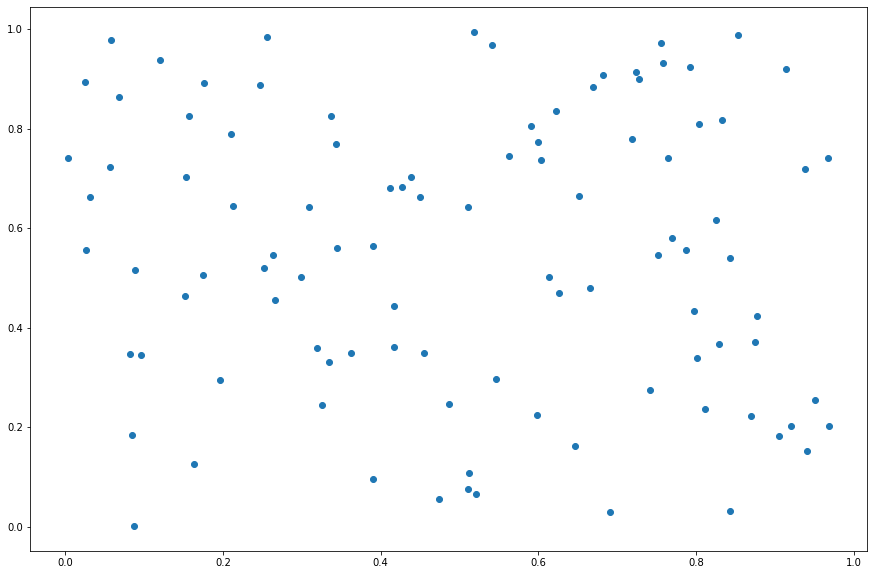

In [26]:
from numpy import random

n = 100
numbers = [random.random() for _ in range(n * 2)]
X = numbers[:n]
Y = numbers[n:]
plt.figure(figsize=(15, 10))
plt.scatter(X, Y, cmap='virdis')
plt.show()

Jak widać generator numpy jest znacznie lepszy. Ciężko tutaj dostrzeć jakiekolwiek korelacje. Rozkład jest bardziej losowy i jest mniej pustych przestrzeni.

### Zadanie 3
Zaimplementuj metodą całkowania Monte Carlo i zastosuj ją wobec następujących całek:
$$ \int_1^2 \frac{1}{x^2}\ dx $$
$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $$
$$ \int_1^{22} x^2+2x\ dx $$

Oblicz także objętości brył:
- kula o promioniu 5
- stożek o wysokości 10 i promieniu podstawy 10
- bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.

Przeanalizuj jak wybór liczby próbek wpływa na wyniki obliczeń. 

In [0]:
import numpy as np

def mc_integrate(function, a, b, N):
    result = 0.0
    for _ in range(N):
        result += function(random.uniform(a, b))
    
    return ((b - a) / N * result)

In [42]:
import scipy.integrate as integrate
from tabulate import tabulate

f1 = lambda x : 1 / (x**2)
f2 = lambda x: 1 / np.sqrt(x**5+8)
f3 = lambda x: x**2 + 2*x

table = [
           ["f1", mc_integrate(f1, 1, 2, 1000), integrate.quad(f1, 1, 2)[0]],
           ["f2", mc_integrate(f2, 1, 6, 1000), integrate.quad(f2, 1, 6)[0]],
           ["f3", mc_integrate(f3, 1, 22, 1000), integrate.quad(f3, 1, 22)[0]]
]

print(tabulate(table, headers=['function', 'Monte Carlo', 'Scipy'], floatfmt=".10f"))

function        Monte Carlo            Scipy
----------  ---------------  ---------------
f1             0.4966285351     0.5000000000
f2             0.4333151265     0.4350597200
f3          3930.6582057179  4032.0000000000


Aby ułatwić sobie zadanie skorzystam z zależności:
$$\frac{V1}{V2} = \frac{n}{N}$$

gdzie: <br>
V1 - objętość szukanej bryły <br>
V2 - objętość prostopadłościanu ograniczającego bryłe<br>
n - liczba wylosowanych punktów które znajdują się w bryle <br>
N - liczba wylosowanych punktów które znajdują się w prostopadłościanie ograniczającym bryłe <br>

Po przekształceniu mamy:

$$V1 = \frac{n}{N} V2$$

V2 możemy w łatwy sposób wyliczyć znając promień kuli <br>

Teraz wszystko sprowadza się do znalezienia warunku który będzie sprawdzał czy dany punkt należy do bryły


In [0]:
def volume1(R, N):
    n = 0
    V2 = (2 * R) ** 3 
    for _ in range(N):
        x, y, z = random.uniform(-R, R), random.uniform(-R, R), random.uniform(-R, R)
        if x ** 2 + y ** 2 + z ** 2 <= R ** 2:
            n += 1
    return (n / N) * V2

In [46]:
R = 5
Vtrue = 4/3 * np.pi * R**3 

table = [
           ["100", volume1(R, 100), Vtrue],
           ["1000", volume1(R, 1000), Vtrue],
           ["10000", volume1(R, 10000), Vtrue]
]

print(tabulate(table, headers=['Iterations', 'estimated value', 'true value'], floatfmt=".10f"))

  Iterations    estimated value      true value
------------  -----------------  --------------
         100     530.0000000000  523.5987755983
        1000     512.0000000000  523.5987755983
       10000     526.7000000000  523.5987755983


In [0]:
def volume2(R, H, N):
    n = 0
    V2 = (2 * R) ** 2 * H  
    for _ in range(N):
        x, y, z = random.uniform(-R, R), random.uniform(-R, R), random.uniform(0, H)
        if x ** 2 + y ** 2 <= ((z * R) / H) ** 2:
            n += 1
    return (n / N) * V2

In [49]:
R = 10
H = 10
Vtrue = 1/3 * np.pi * R**2 * H 

table = [
           ["100", volume2(R, H, 100), Vtrue],
           ["1000", volume2(R, H, 1000), Vtrue],
           ["10000", volume2(R, H, 10000), Vtrue]
]

print(tabulate(table, headers=['Iterations', 'estimated value', 'true value'], floatfmt=".10f"))

  Iterations    estimated value       true value
------------  -----------------  ---------------
         100    1120.0000000000  1047.1975511966
        1000    1072.0000000000  1047.1975511966
       10000    1031.2000000000  1047.1975511966


In [0]:
def in_sphere(x, y, z, R):
    return x ** 2 + y ** 2 + z ** 2 <= R ** 2

def in_roller(x, y, z, R, H):
    return x ** 2 + y ** 2 <= R ** 2 and z >= -H / 2 and z <= H / 2 
    

def volume3(RK, RW, H, N):
    n = 0
    V2 = (2 * RK) ** 3 
    for _ in range(N):
        # Zakładam że walec znajduje się w całości w kuli
        x, y, z = random.uniform(-RK, RK), random.uniform(-RK, RK), random.uniform(-RK, RK)
        if in_sphere(x, y, z, RK) and not in_roller(x, y, z, RW, H):
            n += 1
    return (n / N) * V2

In [65]:
RK = 10
RW = 3
H = 6
Vtrue = 4/3 * np.pi * RK**3 - np.pi * RW ** 2 * H
table = [
           ["100", volume3(RK, RW, H, 100), Vtrue],
           ["1000", volume3(RK, RW, H, 1000), Vtrue],
           ["10000", volume3(RK, RW, H, 10000), Vtrue]
]

print(tabulate(table, headers=['Iterations', 'estimated value', 'true value'], floatfmt=".10f"))

  Iterations    estimated value       true value
------------  -----------------  ---------------
         100    3600.0000000000  4019.1442014925
        1000    4008.0000000000  4019.1442014925
       10000    4038.4000000000  4019.1442014925


Jak widać im większa liczba próbek tym bardziej dokładny wynik